In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv('My_DataFrame.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,28/02/2019 17:32,01/03/2019 08:01,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,28/02/2019 18:53,01/03/2019 06:42,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,28/02/2019 12:13,01/03/2019 05:24,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,28/02/2019 17:54,01/03/2019 04:02,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,28/02/2019 23:54,01/03/2019 00:20,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,01/02/2019 00:04,01/02/2019 00:12,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,01/02/2019 00:05,01/02/2019 00:10,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,01/02/2019 00:06,01/02/2019 00:08,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,01/02/2019 00:05,01/02/2019 00:07,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,01/02/2019 00:00,01/02/2019 00:04,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
#df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [6]:
df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour
df['duration_hour'] = df['duration_sec']/3600

In [7]:
df.replace('Other', 'Female', inplace=True)

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_hour
0,52185,2019-02-28 17:32:00,2019-01-03 08:01:00,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2,3,17,14.495833
1,42521,2019-02-28 18:53:00,2019-01-03 06:42:00,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2,3,18,11.811389
2,61854,2019-02-28 12:13:00,2019-01-03 05:24:00,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2,3,12,17.181667
3,36490,2019-02-28 17:54:00,2019-01-03 04:02:00,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Female,No,2,3,17,10.136111
4,1585,2019-02-28 23:54:00,2019-01-03 00:20:00,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2,3,23,0.440278


In [9]:
print('The shape of the data',df.shape)

The shape of the data (183412, 20)


In [10]:
print(df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453705        3.000000             37.317298   
25%                -122.412408       44.00000

In [11]:
print(df.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_month                         int64
start_weekday                       int64
start_hour                          int64
duration_hour                     float64
dtype: object


In [12]:
# here we want show the null values for each colmun

print("\nMissing values:")
print(df.isnull().sum())



Missing values:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_month                   0
start_weekday                 0
start_hour                    0
duration_hour                 0
dtype: int64


In [13]:
print(df.info)

<bound method DataFrame.info of         duration_sec          start_time            end_time  \
0              52185 2019-02-28 17:32:00 2019-01-03 08:01:00   
1              42521 2019-02-28 18:53:00 2019-01-03 06:42:00   
2              61854 2019-02-28 12:13:00 2019-01-03 05:24:00   
3              36490 2019-02-28 17:54:00 2019-01-03 04:02:00   
4               1585 2019-02-28 23:54:00 2019-01-03 00:20:00   
...              ...                 ...                 ...   
183407           480 2019-01-02 00:04:00 2019-01-02 00:12:00   
183408           313 2019-01-02 00:05:00 2019-01-02 00:10:00   
183409           141 2019-01-02 00:06:00 2019-01-02 00:08:00   
183410           139 2019-01-02 00:05:00 2019-01-02 00:07:00   
183411           271 2019-01-02 00:00:00 2019-01-02 00:04:00   

        start_station_id                                start_station_name  \
0                   21.0  Montgomery St BART Station (Market St at 2nd St)   
1                   23.0                   

In [14]:
missing_values = df.isnull().sum()

In [15]:
# here we want show the null values for each colmun

print("\nMissing values:")
print(missing_values)


Missing values:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_month                   0
start_weekday                 0
start_hour                    0
duration_hour                 0
dtype: int64


In [16]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_hour
0,52185,2019-02-28 17:32:00,2019-01-03 08:01:00,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2,3,17,14.495833
1,61854,2019-02-28 12:13:00,2019-01-03 05:24:00,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2,3,12,17.181667
2,36490,2019-02-28 17:54:00,2019-01-03 04:02:00,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Female,No,2,3,17,10.136111
3,1585,2019-02-28 23:54:00,2019-01-03 00:20:00,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2,3,23,0.440278
4,1793,2019-02-28 23:49:00,2019-01-03 00:19:00,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2,3,23,0.498056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,480,2019-01-02 00:04:00,2019-01-02 00:12:00,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,1,2,0,0.133333
174948,313,2019-01-02 00:05:00,2019-01-02 00:10:00,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,1,2,0,0.086944
174949,141,2019-01-02 00:06:00,2019-01-02 00:08:00,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,1,2,0,0.039167
174950,139,2019-01-02 00:05:00,2019-01-02 00:07:00,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,1,2,0,0.038611


In [17]:
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_month                0
start_weekday              0
start_hour                 0
duration_hour              0
dtype: int64


In [18]:
columns_to_drop = ['end_station_latitude', 'end_station_longitude', 'start_station_longitude', 'start_station_latitude']
df.drop(columns_to_drop, axis=1, inplace=True)

In [19]:
print("chick the shape after dropping the column",df.shape)

chick the shape after dropping the column (174952, 16)


In [20]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_hour
0,52185,2019-02-28 17:32:00,2019-01-03 08:01:00,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2,3,17,14.495833
1,61854,2019-02-28 12:13:00,2019-01-03 05:24:00,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2,3,12,17.181667
2,36490,2019-02-28 17:54:00,2019-01-03 04:02:00,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Female,No,2,3,17,10.136111
3,1585,2019-02-28 23:54:00,2019-01-03 00:20:00,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2,3,23,0.440278
4,1793,2019-02-28 23:49:00,2019-01-03 00:19:00,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2,3,23,0.498056


In [21]:
date_2019 = 2019
df['Age'] = (date_2019 - df['member_birth_year']).astype(int)
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_hour,Age
0,52185,2019-02-28 17:32:00,2019-01-03 08:01:00,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2,3,17,14.495833,35
1,61854,2019-02-28 12:13:00,2019-01-03 05:24:00,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2,3,12,17.181667,47
2,36490,2019-02-28 17:54:00,2019-01-03 04:02:00,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Female,No,2,3,17,10.136111,30
3,1585,2019-02-28 23:54:00,2019-01-03 00:20:00,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2,3,23,0.440278,45
4,1793,2019-02-28 23:49:00,2019-01-03 00:19:00,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2,3,23,0.498056,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,480,2019-01-02 00:04:00,2019-01-02 00:12:00,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,No,1,2,0,0.133333,23
174948,313,2019-01-02 00:05:00,2019-01-02 00:10:00,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984.0,Male,No,1,2,0,0.086944,35
174949,141,2019-01-02 00:06:00,2019-01-02 00:08:00,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,Yes,1,2,0,0.039167,29
174950,139,2019-01-02 00:05:00,2019-01-02 00:07:00,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,No,1,2,0,0.038611,31


In [22]:
max_duration = df['duration_sec'].max()
print("Maximum duration:", max_duration)

Maximum duration: 84548


In [23]:
min_duration = df['duration_sec'].min()
print("Minimem duration:", min_duration)

Minimem duration: 61


In [24]:
max_station = df['start_station_name'].max()
print("Maximum start station name:", max_station)

Maximum start station name: Yerba Buena Center for the Arts (Howard St at 3rd St)


In [25]:
min_station = df['start_station_name'].min()
print("minimum start station name:", min_station)

minimum start station name: 10th Ave at E 15th St


In [26]:
palette = ['cornflowerblue']

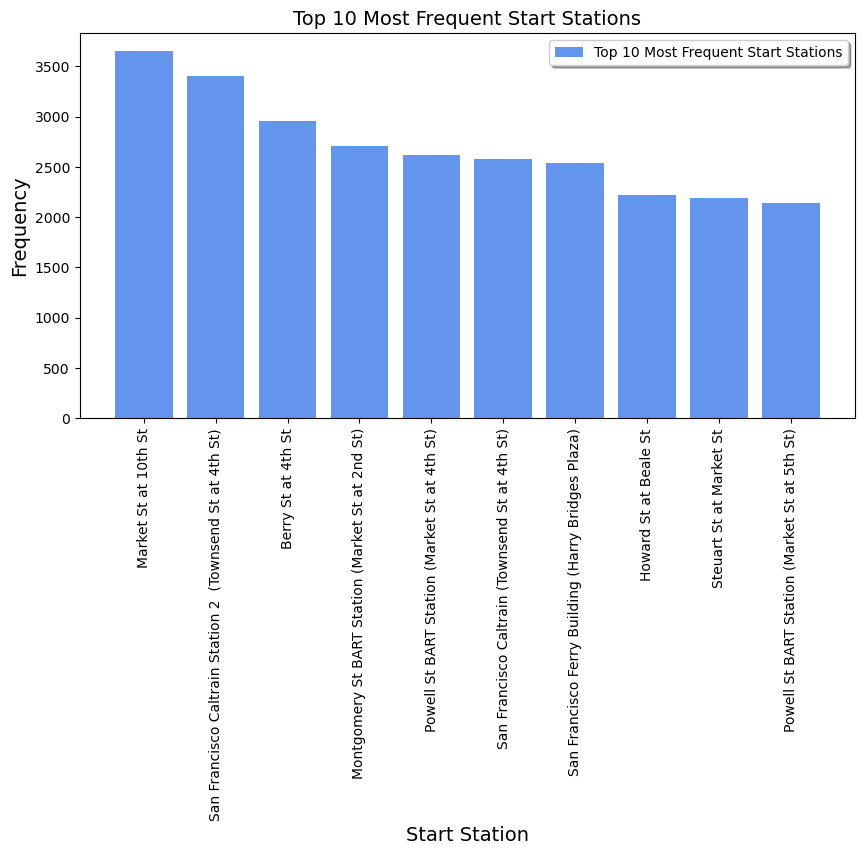

In [27]:
top_start_stations = df['start_station_name'].value_counts().head(10)
plt.figure(figsize=[10,5])
plt.bar(top_start_stations.index, top_start_stations.values, color = palette)
plt.legend(['Top 10 Most Frequent Start Stations'], shadow = True, loc = 0)
plt.xlabel('Start Station', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent Start Stations', fontsize=14)
plt.xticks(rotation=90)
plt.show()

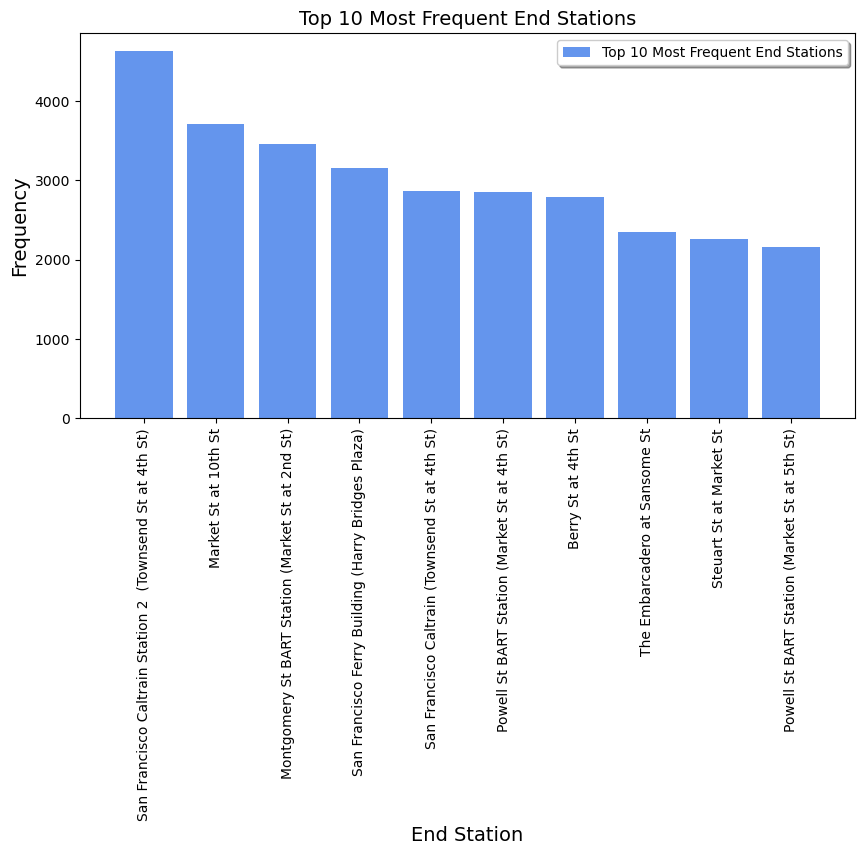

In [28]:

top_end_stations = df['end_station_name'].value_counts().head(10)
plt.figure(figsize=[10,5])
plt.bar(top_end_stations.index, top_end_stations.values, color = palette)
plt.legend(['Top 10 Most Frequent End Stations'], shadow = True, loc = 0)
plt.xlabel('End Station', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent End Stations', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [29]:
count = df['start_station_id'].value_counts(ascending=True)
number = df.groupby("start_station_id", as_index=False).sum()["start_station_id"]
# number
# count

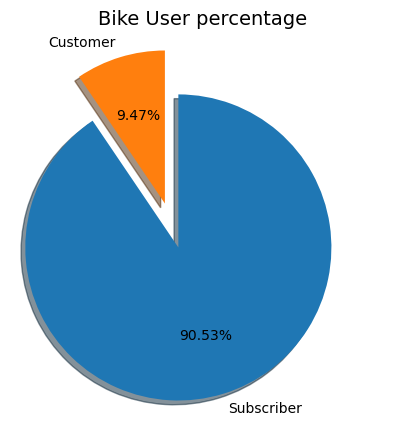

In [30]:
plt.figure(figsize=(10,5))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%', shadow = True, explode = [0.3, 0]);
plt.axis('square')
plt.title('Bike User percentage', fontsize=14);

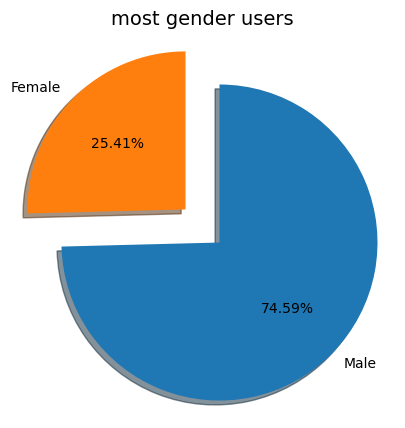

In [31]:
plt.figure(figsize=(10,5))
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%', shadow = True, explode = [0.3, 0]);
plt.axis('square')
plt.title('most gender users', fontsize=14);

<Figure size 1000x500 with 0 Axes>

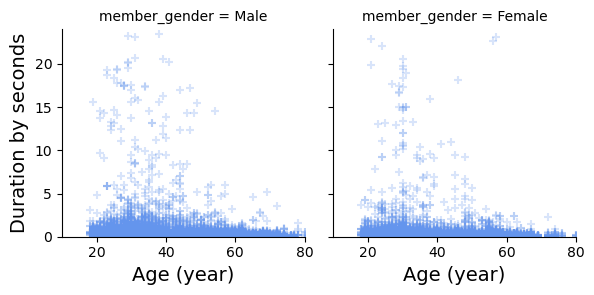

In [32]:
plt.figure(figsize=[10,5])
genders = sns.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, 
                 xlim = [10, 80], ylim = [0, 24])
genders.map(plt.scatter, 'Age', 'duration_hour', alpha=0.25,marker = '+', color = palette)
genders.set_xlabels('Age (year)', fontsize=14)
genders.set_ylabels('Duration by seconds', fontsize=14)

plt.show()

## The average of the trip in minutes with ages

In [33]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

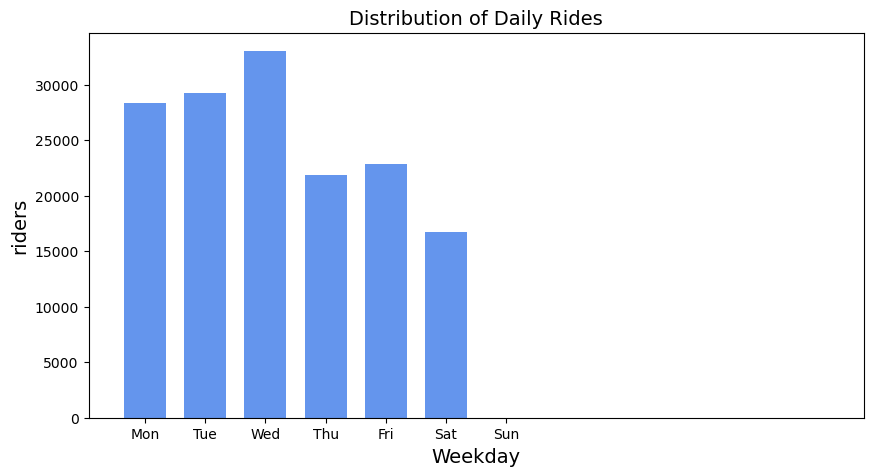

In [34]:
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.figure(figsize=[10,5])
plt.hist(data = df, x = 'start_weekday', bins = bin_edges, rwidth = 0.7, color = palette)
plt.xticks(np.arange(1, 7 + 1, 1),weekdays)
plt.xlabel('start_weekday')
plt.title('Distribution of Daily Rides', fontsize=14)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('riders', fontsize=14)
plt.show()

In [35]:
df.loc[df['start_weekday']==7]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_hour,Age


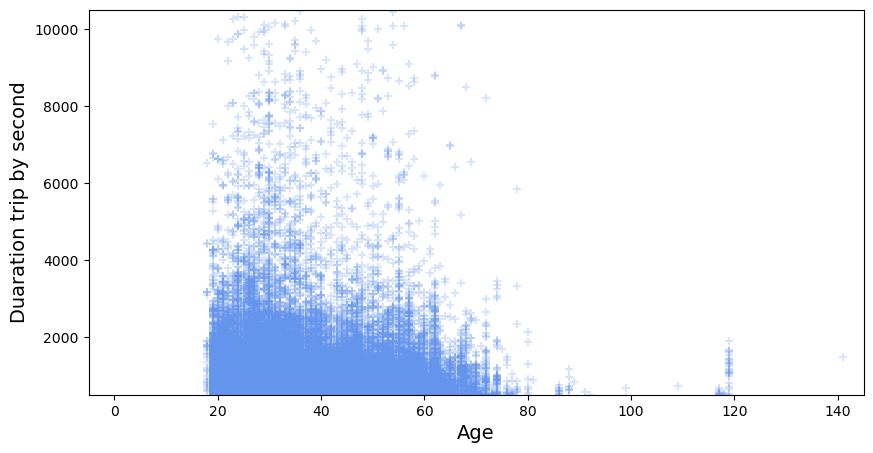

ages between 20< age <60 the duration trip are high , and then from 60< age <80 the duration trip decrease but not all of it in age 80 we got 6000 sec and thats high.


In [36]:
plt.figure(figsize=[10,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '+', color = palette )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age', fontsize=14)
plt.ylabel('Duaration trip by second', fontsize=14)
plt.show()
print('ages between 20< age <60 the duration trip are high , and then from 60< age <80 the duration trip decrease but not all of it in age 80 we got 6000 sec and thats high.')

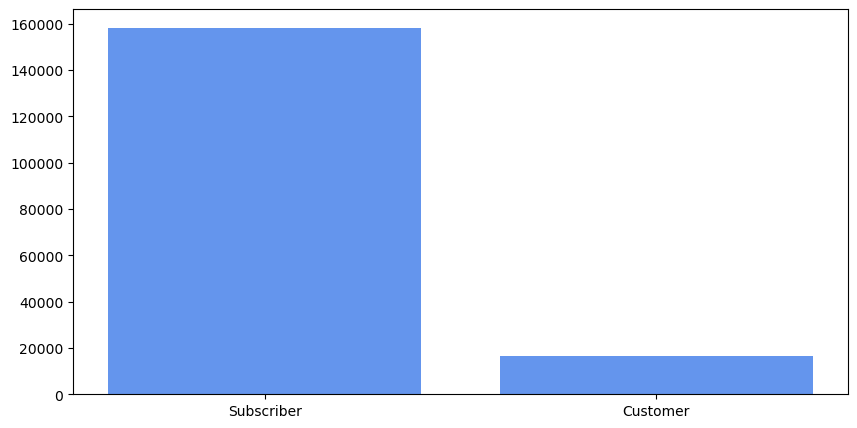

In [37]:
user_type_counts = df['user_type'].value_counts()
plt.figure(figsize=[10,5])
plt.bar(user_type_counts.index, user_type_counts.values, color = palette);

<Figure size 1000x500 with 0 Axes>

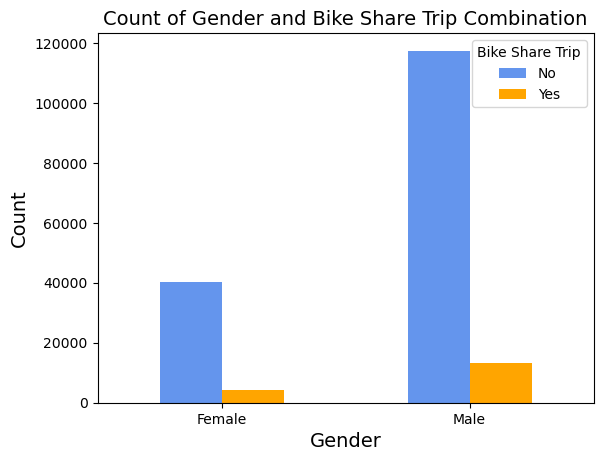

In [38]:
colors = ['cornflowerblue','orange']
plt.figure(figsize=[10,5])
grouped_counts = df.groupby(['member_gender', 'bike_share_for_all_trip']).size().unstack()
grouped_counts
# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=False,color = colors)

plt.title('Count of Gender and Bike Share Trip Combination', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Bike Share Trip')
plt.xticks(rotation=0)

plt.show()

# df.head()

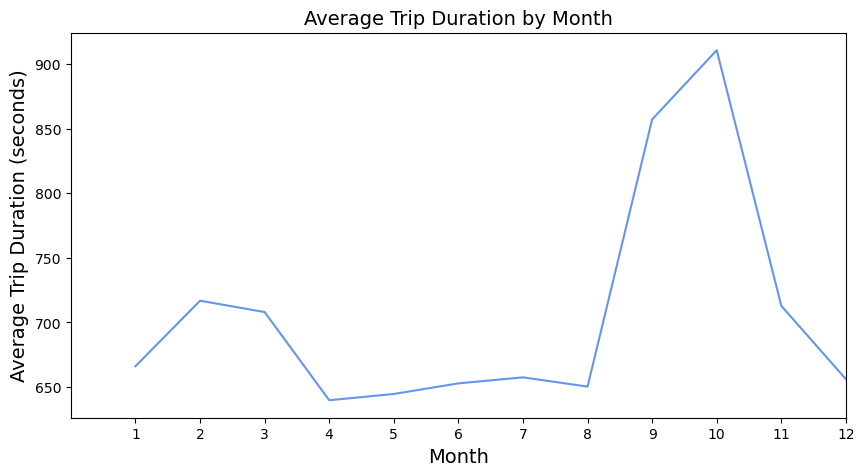

In [39]:
monthly_avg_duration = df.groupby('start_month')['duration_sec'].mean()
plt.figure(figsize=[10,5])
plt.plot(monthly_avg_duration.index, monthly_avg_duration.values, c = 'cornflowerblue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Trip Duration (seconds)', fontsize=14)
plt.title('Average Trip Duration by Month', fontsize=14)
plt.xlim(0,12)
plt.xticks(range(1,13))
plt.show()

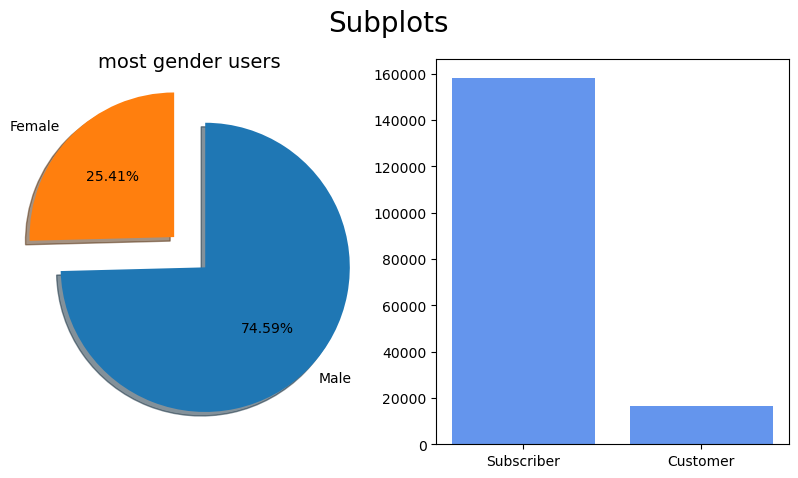

In [40]:
#subplot
plt.figure(figsize=[10,5])
plt.suptitle('Subplots',fontsize = 20)


#1
plt.subplot(1,2,1) #(number of rows, number of columns, number of plot)
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%', shadow = True, explode = [0.3, 0]);
plt.axis('square')
plt.title('most gender users', fontsize=14);
#2
plt.subplot(1,2,2) #(number of rows, number of columns, number of plot)
user_type_counts = df['user_type'].value_counts()
plt.bar(user_type_counts.index, user_type_counts.values, color = palette);

In [41]:
from pandas_profiling import ProfileReport
# Generate the pandas profiling report
report = ProfileReport(df)

# Save the report as an HTML file
report.to_file('data_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]